In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")
pd.set_option("display.max_rows", None)

In [423]:
customer = pd.read_csv("customer_segmentation.csv")
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [350]:
# List of all the columns in the dataset.
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='str')

In [351]:
# Let's see the data dimension
customer.shape

(2240, 29)

In [352]:
# Let's see all the information for the dataset.
customer.info()

<class 'pandas.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   str    
 3   Marital_Status       2240 non-null   str    
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   str    
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64  
 16 

In [353]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [354]:
# Let's see the null values in the dataset.

customer.isna().sum()/ len(customer)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [355]:
customer.dropna(inplace=True)

In [356]:
customer.isna().sum().sum()

np.int64(0)

In [357]:
customer["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [358]:
customer["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [359]:
customer["Dt_Customer"] = pd.to_datetime(customer["Dt_Customer"], dayfirst=True)

In [360]:
print(customer["Dt_Customer"].dtype)

datetime64[us]


In [361]:
customer["Age"] = 2012 - customer["Year_Birth"]

customer["Age"].max()

119

In [362]:
customer["Total_children"] = customer["Kidhome"] + customer["Teenhome"]

In [363]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,55,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,58,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,47,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,28,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,31,1


In [364]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children'],
      dtype='str')

In [365]:
spend_col = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]


In [366]:
customer["Total_spends"] = customer[spend_col].sum(axis=1)
customer["Total_spends"]

0       1617
1         27
2        776
3         53
4        422
5        716
6        590
7        169
8         46
9         49
11        61
12      1102
13       310
14        46
15      1315
16        96
17       317
18      1782
19       133
20       316
21      1730
22       972
23       544
24       444
25        75
26       257
28       131
29      1672
30        30
31       318
32       120
33       302
34      1196
35        65
36       913
37        81
38        67
39       902
40      1395
41        53
42        22
44        31
45       984
46       122
47        55
49      1319
50       507
51      1693
52        72
53      1617
54       606
55      1957
56      1093
57        29
59       518
60      1438
61       612
62       884
63       606
64      1076
65        34
66        11
67      1274
68       653
69      1562
70      1253
72       863
73       661
74        65
75        13
76      1890
77      2209
78        18
79       692
80       165
81        16
82        79

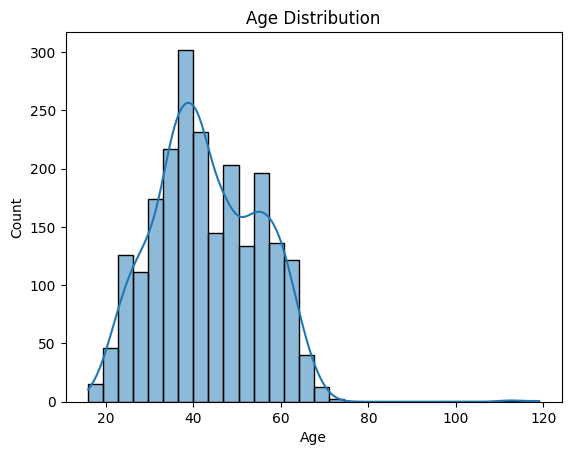

In [367]:
sns.histplot(customer["Age"], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

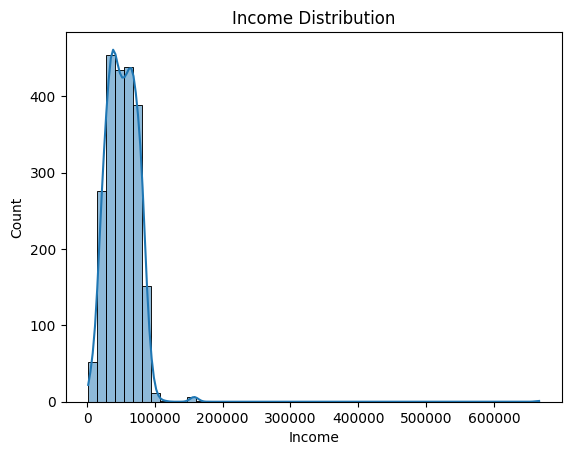

In [368]:
sns.histplot(customer["Income"], kde=True, bins=50)
plt.title("Income Distribution")
plt.show()

In [369]:
customer["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

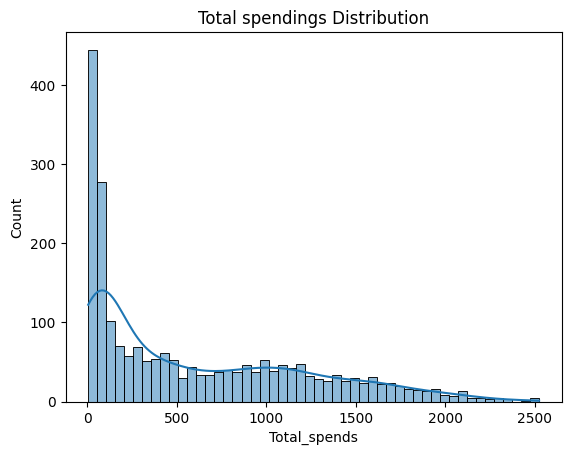

In [370]:
sns.histplot(customer["Total_spends"], kde=True, bins=50)
plt.title("Total spendings Distribution")
plt.show()

In [371]:
customer["Total_spends"].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Total_spends, dtype: float64

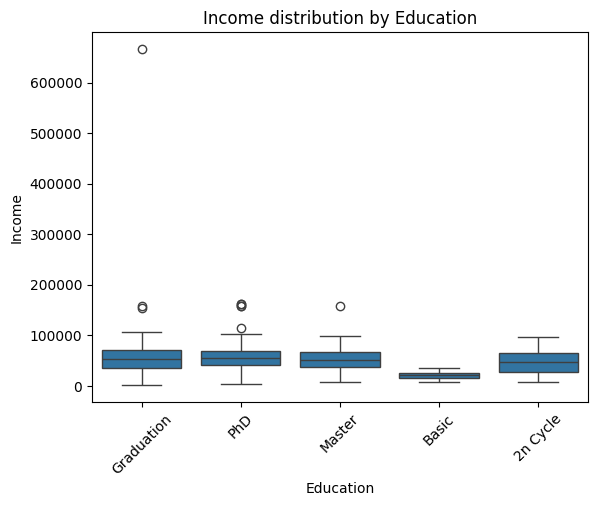

In [372]:
sns.boxplot(x="Education", y="Income", data= customer)
plt.xticks(rotation = 45)
plt.title("Income distribution by Education")
plt.show()

In [373]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_spends'],
      dtype='str')

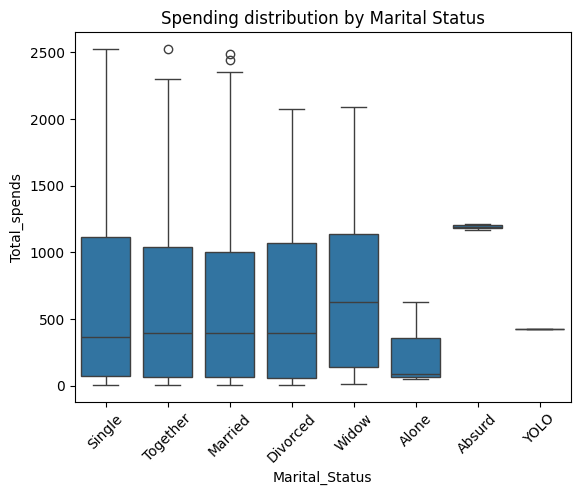

In [374]:
sns.boxplot(x="Marital_Status", y="Total_spends", data= customer)
plt.xticks(rotation = 45)
plt.title("Spending distribution by Marital Status")
plt.show()

In [375]:
corr = customer[["Age", "Income", "Recency", "Total_spends", "NumStorePurchases", "NumWebPurchases", "NumDealsPurchases", "Total_children" ]].corr()

In [376]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_spends'],
      dtype='str')

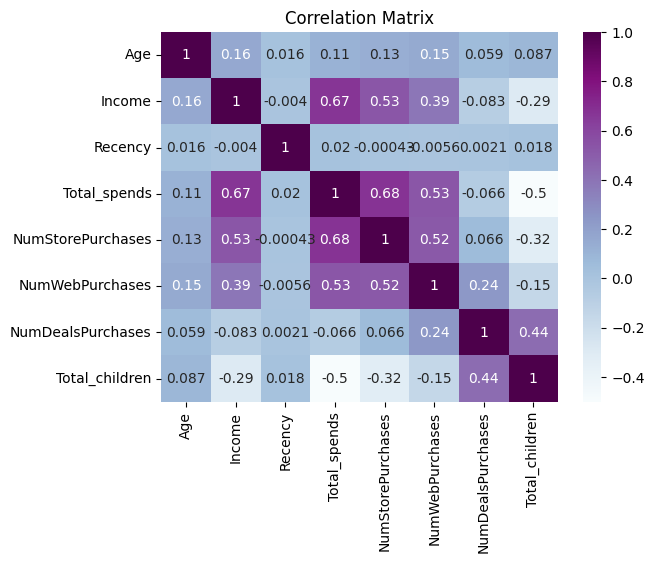

In [377]:
sns.heatmap(corr, annot=True, cmap="BuPu")
plt.title("Correlation Matrix")
plt.show()

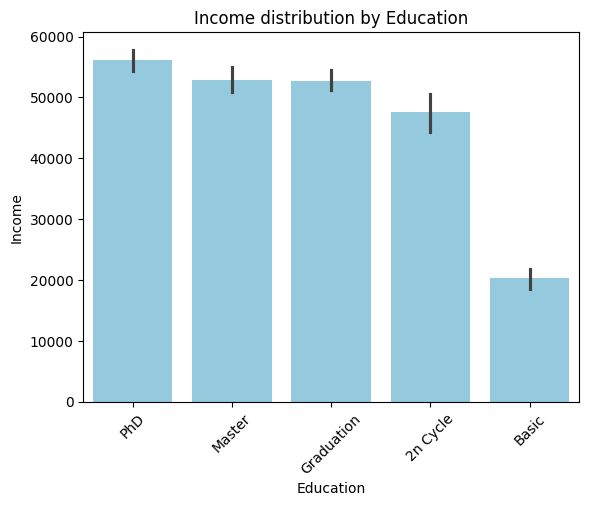

In [378]:
order = customer.groupby("Education")["Income"].mean().sort_values(ascending=False).index

sns.barplot(x="Education", y="Income", data=customer, order= order, color="skyblue")
plt.title("Income distribution by Education")
plt.xticks(rotation  =45)
plt.show()

In [379]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_spends'],
      dtype='str')

In [380]:
customer["Acceptedany"] = customer[["AcceptedCmp1", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp2"]].sum(axis=1)

In [381]:
customer["Acceptedany"] = customer["Acceptedany"].apply(lambda x: 1 if x > 0 else 0)

In [382]:
customer["Acceptedany"].unique()

array([0, 1])

In [383]:
group2 = customer.groupby("Marital_Status")["Acceptedany"].mean().sort_values(ascending = False)

In [384]:
group2

Marital_Status
Absurd      0.500000
Alone       0.333333
Widow       0.236842
Married     0.211202
Single      0.205945
Together    0.200698
Divorced    0.198276
YOLO        0.000000
Name: Acceptedany, dtype: float64

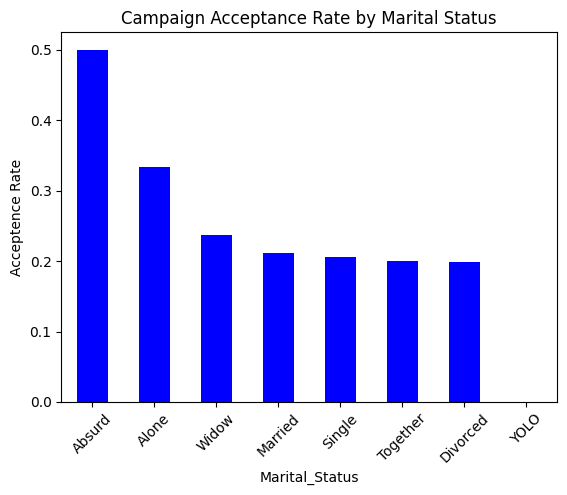

In [385]:
group2.plot(kind = "bar", color = "Blue")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptence Rate")
plt.xticks(rotation = 45)
plt.show()

In [386]:
bins = [18, 30, 40, 50, 60, 70, 90]

In [387]:
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]

In [388]:
customer["AgeGroup"] = pd.cut(customer["Age"], bins = bins, labels = labels)

In [389]:
customer["AgeGroup"]

0       50-59
1       50-59
2       40-49
3       18-29
4       30-39
5       40-49
6       40-49
7       18-29
8       30-39
9       60-69
11      30-39
12      50-59
13      50-59
14      18-29
15      60-69
16      30-39
17      60-69
18      60-69
19      18-29
20      18-29
21      30-39
22      60-69
23      50-59
24      60-69
25      40-49
26      30-39
28      18-29
29      40-49
30      18-29
31      40-49
32      40-49
33      50-59
34      60-69
35      60-69
36      40-49
37      30-39
38      30-39
39      60-69
40      30-39
41      18-29
42      50-59
44      30-39
45      30-39
46        NaN
47      40-49
49      50-59
50      50-59
51      40-49
52      30-39
53      30-39
54      30-39
55      50-59
56      40-49
57      18-29
59      40-49
60      18-29
61      30-39
62      50-59
63      60-69
64      60-69
65      40-49
66      40-49
67      30-39
68      50-59
69      40-49
70      50-59
72      50-59
73      30-39
74      50-59
75      30-39
76      30-39
77    

In [390]:
group3 = customer.groupby("AgeGroup")["Income"].mean()

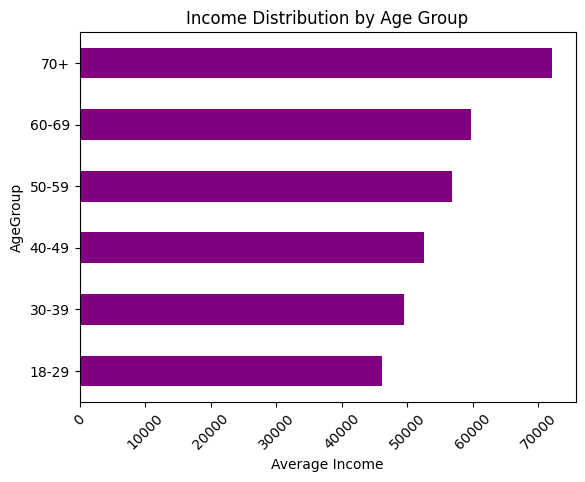

In [391]:
group3.plot(kind= "barh", color="Purple")
plt.title("Income Distribution by Age Group")
plt.xticks(rotation = 45)
plt.xlabel("Average Income")
plt.show()

In [392]:
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_spends', 'Acceptedany', 'AgeGroup'],
      dtype='str')

In [393]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_children,Total_spends,Acceptedany,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,55,0,1617,0,50-59
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,58,2,27,0,50-59
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,47,0,776,0,40-49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,28,1,53,0,18-29
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,31,1,422,0,30-39


In [394]:
features = ["Age", "Income","Total_spends", "Acceptedany", "Total_children", "NumStorePurchases", "NumDealsPurchases", "Recency"]



In [395]:
X = customer[features].copy()

In [396]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_scaled = scalar.fit_transform(X)

In [397]:
X

,Age,Income,Total_spends,Acceptedany,Total_children,NumStorePurchases,NumDealsPurchases,Recency
0,55,58138.0,1617,0,0,4,3,58
1,58,46344.0,27,0,2,2,2,38
2,47,71613.0,776,0,0,10,1,26
3,28,26646.0,53,0,1,4,2,26
4,31,58293.0,422,0,1,6,5,94
5,45,62513.0,716,0,1,10,2,16
6,41,55635.0,590,0,1,7,4,34
7,27,33454.0,169,0,1,4,2,32
8,38,30351.0,46,0,1,2,1,19
9,62,5648.0,49,1,2,0,1,68


In [398]:
print(X_scaled)

[[ 0.98644293  0.2340627   1.67548812 ... -0.55414289  0.35171348
   0.31053212]
 [ 1.23680074 -0.23455948 -0.96235832 ... -1.16951781 -0.1682312
  -0.38050944]
 [ 0.31882209  0.76947764  0.28024985 ...  1.29198186 -0.68817587
  -0.79513438]
 ...
 [-1.01641959  0.18809052  1.05169551 ...  2.21504423 -0.68817587
   1.4507507 ]
 [ 1.06989553  0.67538765  0.39140438 ...  1.29198186 -0.1682312
  -1.41707178]
 [ 1.23680074  0.02470453 -0.7218     ... -0.55414289  0.35171348
  -0.31140528]]


In [399]:
from sklearn.cluster import KMeans

wcss = []

In [400]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
  

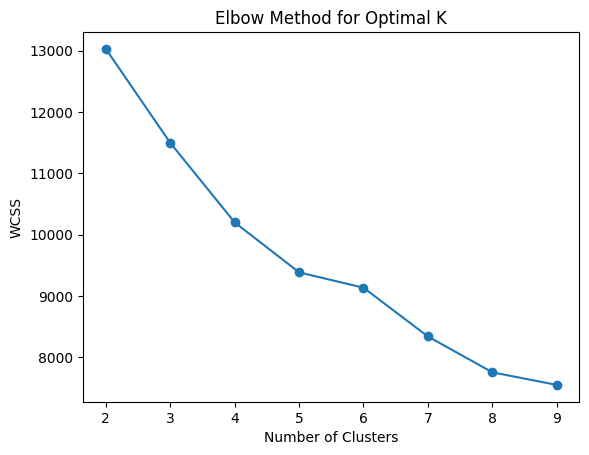

In [401]:
# Let's create an Elbow curve to determine the optimum value of "K"
plt.plot(range(2,10), wcss, marker = "o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [402]:
kmeans = KMeans(n_clusters = 6, random_state=14)


In [403]:
customer["Cluster"] = kmeans.fit_predict(X_scaled)

In [404]:
customer["Cluster"].value_counts()

Cluster
1    634
2    349
3    339
5    338
4    333
0    223
Name: count, dtype: int64

In [405]:
customer["Cluster"].nunique()


6

In [413]:
cluster_summary = customer.groupby("Cluster")[features].mean()

In [415]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X_scaled)
customer["PCA1"], customer["PCA2"] = pca_data[:,0],pca_data[:,1]

In [416]:
pca_data

array([[ 1.15167423,  0.16477051],
       [-1.73145706,  0.67616625],
       [ 1.56232811, -0.4602323 ],
       ...,
       [ 2.75705094, -0.84161026],
       [ 1.06628444,  0.82554706],
       [-1.26510292,  1.26112057]], shape=(2216, 2))

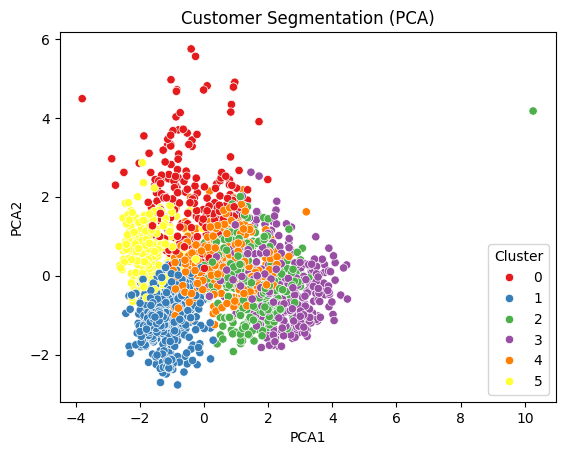

In [418]:
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data = customer, palette = "Set1")

plt.title("Customer Segmentation (PCA)")
plt.show()

In [420]:
customer["Cluster"].value_counts()

Cluster
1    634
2    349
3    339
5    338
4    333
0    223
Name: count, dtype: int64

In [421]:
cluster_summary

,Age,Income,Total_spends,Acceptedany,Total_children,NumStorePurchases,NumDealsPurchases,Recency
Cluster,,,,,,,,
0,44.188341,53137.704036,655.174888,0.143498,1.529148,6.847534,6.636771,48.632287
1,35.119874,31103.701893,103.738170,0.086751,0.837539,3.182965,1.730284,48.684543
2,38.736390,72682.137536,1157.610315,0.000000,0.487106,9.240688,1.661891,53.936963
3,44.811209,74411.784661,1383.256637,1.000000,0.377581,8.165192,1.522124,48.463127
4,56.990991,60497.360360,681.774775,0.009009,0.669670,6.732733,1.921922,43.741742
5,46.976331,39861.455621,98.946746,0.088757,2.088757,3.180473,2.473373,50.538462


#### Cluster 0: "High-Middle Age customer, Medium Income, Medium spending, Low in numbers" (223 customers)
#### Cluster 1: "Lower Middle Age customer, Low on Income, Low Spendings, High in numbers" (634 customers)
#### Cluster 2: "Middle Age customer, High Income, High Spending" (349 customers)
#### Cluster 3: "High-Middle Age customer, Highest Income, Highest Spending" (339 customers)
#### Cluster 4: "Old Age customer, High Income, Medium Spending" (333 customers)
#### Cluster 5: "High-Middle Age customer, Low Income, Very low Spending" (333 customers)